In [103]:
import pandas as pd
import networkx as nx
import numpy as np
import random
from tqdm import tqdm

import matplotlib.pyplot as plt

## TESTS:
***

In [6]:
#Load the data and generate the graph

fields = ['yr','rt3ISO','pt3ISO','cmdCode','TradeValue']
df = pd.read_csv("current_data/final_dataset.csv", skipinitialspace = True, usecols = fields)
df = df[df['cmdCode'] == 1]

G = nx.from_pandas_edgelist(df,
                             source       = 'rt3ISO',
                             target       = 'pt3ISO',
                             edge_attr    =  'TradeValue',
                             create_using = nx.DiGraph())

In [4]:
countries_rt = df['rt3ISO'].unique()
countries_rt.sort() # if some element is nan sort fails!
countries_pt = df['pt3ISO'].unique()
countries_pt.sort()
commodities = df['cmdCode'].unique()
periods = df['yr'].unique()
print('Periods -> ', len(periods))
print('# of reporter countries -> ', len(countries_rt))
print('# of partner countries -> ', len(countries_pt))
print('# of commodities -> ',  len(commodities))

Periods ->  1
# of reporter countries ->  169
# of partner countries ->  233
# of commodities ->  23


In [5]:
commodities

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23])

In [46]:
k_in  = np.array(list(dict(G.in_degree()).values()))
k_out = np.array(list(dict(G.out_degree()).values()))
k     = np.array(list(dict(G.degree()).values()))
k_in.sum()/len(k_in)

20.216494845360824

In [50]:
(k**2).sum()/len(k) - 2* k.sum()/len(k)

3415.0

In [61]:
len(max(nx.weakly_connected_components(G), key=len))

194

In [79]:
to_remove = random.sample(G.edges(), 1000)

In [80]:
G_TEST = G.copy()
G_TEST.remove_edges_from(to_remove)

In [82]:
k_in  = np.array(list(dict(G.in_degree()).values()))
k_out = np.array(list(dict(G.out_degree()).values()))
k     = np.array(list(dict(G.degree()).values()))
k_in.sum()/len(k_in)

15.061855670103093

In [77]:
sorted(nx.weakly_connected_components(G), key=len, reverse=True)[1]

{'NIU'}

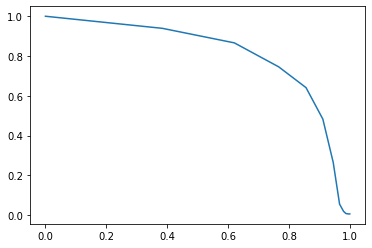

In [9]:
steps = 20
n_nodes = len(G.nodes())
n_edges = len(G.edges())
# To obtain a probability we should divide by total number of nodes, but
# we are interested in the ration of probability, so we can avoid some calculations
P_0 = len(max(nx.strongly_connected_components(G), key=len)) #/ n_nodes
P_f = []
#frac_to_drop = np.linspace(0.001,0.999,steps)
frac_to_drop = 1 - np.logspace(0,-4,steps)
for f in frac_to_drop:
    pf = 0
    for i in range(20):
        G_reduced = G.copy()
        to_remove = random.sample(G.edges(), int(f*n_edges))
        G_reduced.remove_edges_from(to_remove)
        #k = np.array(list(dict(G_reduced.degree()).values()))
        pf += len(max(nx.strongly_connected_components(G_reduced), key=len))
    P_f.append((pf/20) / P_0)
    #print("f removed: ", f)
    #print("size of GC: ", len(max(nx.strongly_connected_components(G_reduced), key=len)))
    #print("Exist GC: ", (k**2).sum()/len(k) - 2* k.sum()/len(k) > 0)
plt.plot(frac_to_drop, P_f)

In [61]:
unsorted_EBC = nx.edge_betweenness_centrality(G)#, weight='TradeValue')
sorted_EBC   = dict(sorted(unsorted_EBC.items(), key=lambda item: item[1], reverse=True))  
#unsorted_EBC

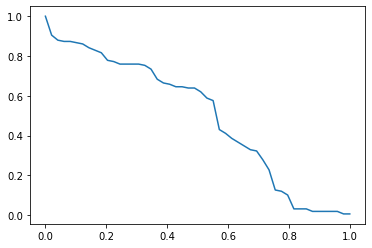

In [62]:
steps = 50
n_nodes = len(G.nodes())
n_edges = len(G.edges())
# To obtain a probability we should divide by total number of nodes, but
# we are interested in the ration of probability, so we can avoid some calculations
P_0 = len(max(nx.strongly_connected_components(G), key=len)) #/ n_nodes
P_f = []
frac_to_drop = np.linspace(0.001,0.999,steps)
#frac_to_drop = 1 - np.logspace(0,-4,steps)
for f in frac_to_drop:
    G_reduced = G.copy()
    to_remove = list(sorted_EBC.keys())[:int(f*n_edges)]
    G_reduced.remove_edges_from(to_remove)
    #k = np.array(list(dict(G_reduced.degree()).values()))
    pf = len(max(nx.strongly_connected_components(G_reduced), key=len))
    P_f.append(pf / P_0)
    #print("f removed: ", f)
    #print("size of GC: ", len(max(nx.strongly_connected_components(G_reduced), key=len)))
    #print("Exist GC: ", (k**2).sum()/len(k) - 2* k.sum()/len(k) > 0)
plt.plot(frac_to_drop, P_f)

In [39]:
unsorted_strong = {(edge[0], edge[1]) : edge[2] for edge in G.edges(data='TradeValue')}
sorted_strong   = dict(sorted(unsorted_strong.items(), key=lambda item: item[1], reverse=True))  
#{(edge[0], edge[1]) : edge[2] for edge in G.edges(data='TradeValue')}
#sorted_strong

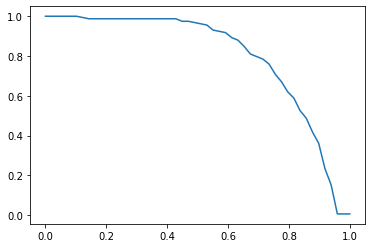

In [40]:
unsorted_strong = {(edge[0], edge[1]) : edge[2] for edge in G.edges(data='TradeValue')}
sorted_strong   = dict(sorted(unsorted_strong.items(), key=lambda item: item[1], reverse=True))  
steps = 50
n_nodes = len(G.nodes())
n_edges = len(G.edges())
# To obtain a probability we should divide by total number of nodes, but
# we are interested in the ration of probability, so we can avoid some calculations
P_0 = len(max(nx.strongly_connected_components(G), key=len)) #/ n_nodes
P_f = []
frac_to_drop = np.linspace(0.001,0.999,steps)
#frac_to_drop = 1 - np.logspace(0,-4,steps)
for f in frac_to_drop:
    G_reduced = G.copy()
    to_remove = list(sorted_strong.keys())[:int(f*n_edges)]
    G_reduced.remove_edges_from(to_remove)
    #k = np.array(list(dict(G_reduced.degree()).values()))
    pf = len(max(nx.strongly_connected_components(G_reduced), key=len))
    P_f.append(pf / P_0)
    #print("f removed: ", f)
    #print("size of GC: ", len(max(nx.strongly_connected_components(G_reduced), key=len)))
    #print("Exist GC: ", (k**2).sum()/len(k) - 2* k.sum()/len(k) > 0)
plt.plot(frac_to_drop, P_f)

In [50]:
unsorted_DP = {(edge[0], edge[1]) : G.degree()[edge[0]]*G.degree()[edge[1]] for edge in G.edges()}
sorted_DP   = dict(sorted(unsorted_DP.items(), key=lambda item: item[1], reverse=True))  
#sorted_DP

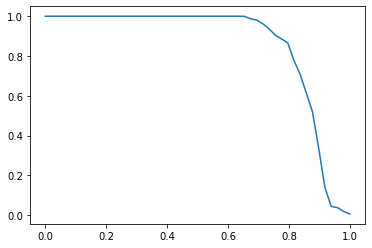

In [51]:
unsorted_DP = {(edge[0], edge[1]) : G.degree()[edge[0]]*G.degree()[edge[1]] for edge in G.edges()}
sorted_DP   = dict(sorted(unsorted_DP.items(), key=lambda item: item[1], reverse=True))  
steps = 50
n_nodes = len(G.nodes())
n_edges = len(G.edges())
# To obtain a probability we should divide by total number of nodes, but
# we are interested in the ration of probability, so we can avoid some calculations
P_0 = len(max(nx.strongly_connected_components(G), key=len)) #/ n_nodes
P_f = []
frac_to_drop = np.linspace(0.001,0.999,steps)
#frac_to_drop = 1 - np.logspace(0,-4,steps)
for f in frac_to_drop:
    G_reduced = G.copy()
    to_remove = list(sorted_DP.keys())[:int(f*n_edges)]
    G_reduced.remove_edges_from(to_remove)
    #k = np.array(list(dict(G_reduced.degree()).values()))
    pf = len(max(nx.strongly_connected_components(G_reduced), key=len))
    P_f.append(pf / P_0)
    #print("f removed: ", f)
    #print("size of GC: ", len(max(nx.strongly_connected_components(G_reduced), key=len)))
    #print("Exist GC: ", (k**2).sum()/len(k) - 2* k.sum()/len(k) > 0)
plt.plot(frac_to_drop, P_f)

## Robustness:
***

To represent the robustness of the Network we are going to consider the probability of a node to belong to the Largest strongly(weakly) Connected Component, LCC w.r.t. the fraction f of removed links.

The probability is normalized w.r.t. the probability of belonging to LCC when no links are removed.

The robustness is tested for:
* Random attack: the links to be removed are chosen at random.
* BC attack: links are removed according to their betweenness centrality (BC), i.e. links with higher betweenness centrality are deleted first.
* BCw attack: links are removed according to their weighted betwennes centrality.
* Strong attack: links are removed in decreasing order of weight, i.e. links with higher weight are removed first and it represents an attack directed to strong links.

In [101]:
def test_robustness(G, strongly=True, plot=False, cmdLabel=1):
    steps     = 50
    rand_step = 20
    n_nodes = len(G.nodes())
    n_edges = len(G.edges())
    
    unsorted_EBC = nx.edge_betweenness_centrality(G)
    sorted_EBC   = dict(sorted(unsorted_EBC.items(), key=lambda item: item[1], reverse=True))
    unsorted_EBCw = nx.edge_betweenness_centrality(G, weight='TradeValue')
    sorted_EBCw   = dict(sorted(unsorted_EBCw.items(), key=lambda item: item[1], reverse=True))
    unsorted_strong = {(edge[0], edge[1]) : edge[2] for edge in G.edges(data='TradeValue')}
    sorted_strong   = dict(sorted(unsorted_strong.items(), key=lambda item: item[1], reverse=True))  
    #unsorted_DP = {(edge[0], edge[1]) : G.degree()[edge[0]]*G.degree()[edge[1]] for edge in G.edges()}
    #sorted_DP   = dict(sorted(unsorted_DP.items(), key=lambda item: item[1], reverse=True))  


    if (strongly):
        P_0 = len(max(nx.strongly_connected_components(G), key=len)) #/ n_nodes
    else:
        P_0 = len(max(nx.weakly_connected_components(G), key=len)) #/ n_nodes
    
    out = dict()
    P_f = [[],[],[]]
    P_f_rand = []
    frac_to_drop = np.linspace(0.001,0.999,steps)
    frac_to_drop_rand = 1 - np.logspace(0,-4,steps)
    # BC attack
    for f in tqdm(frac_to_drop, desc='cmd='+str(cmdLabel)+' BC_atk', leave=False):
        G_reduced = G.copy()
        to_remove = list(sorted_EBC.keys())[:int(f*n_edges)]
        G_reduced.remove_edges_from(to_remove)
        if (strongly):
            pf = len(max(nx.strongly_connected_components(G_reduced), key=len))
        else:
            pf = len(max(nx.weakly_connected_components(G_reduced), key=len))
        P_f[0].append(pf / P_0)
    # BCw attack
    for f in tqdm(frac_to_drop, desc='cmd='+str(cmdLabel)+' BCw_atk', leave=False):
        G_reduced = G.copy()
        to_remove = list(sorted_EBCw.keys())[:int(f*n_edges)]
        G_reduced.remove_edges_from(to_remove)
        if (strongly):
            pf = len(max(nx.strongly_connected_components(G_reduced), key=len))
        else:
            pf = len(max(nx.weakly_connected_components(G_reduced), key=len))
        P_f[1].append(pf / P_0)
    # Strong attack
    for f in tqdm(frac_to_drop, desc='cmd='+str(cmdLabel)+' Str_atk', leave=False):
        G_reduced = G.copy()
        to_remove = list(sorted_strong.keys())[:int(f*n_edges)]
        G_reduced.remove_edges_from(to_remove)
        if (strongly):
            pf = len(max(nx.strongly_connected_components(G_reduced), key=len))
        else:
            pf = len(max(nx.weakly_connected_components(G_reduced), key=len))
        P_f[2].append(pf / P_0)
    # Random atack
    for f in tqdm(frac_to_drop_rand, desc='cmd='+str(cmdLabel)+' Rand_atk', leave=False):
        pf = 0
        for i in range(20):
            G_reduced = G.copy()
            to_remove = random.sample(G.edges(), int(f*n_edges))
            G_reduced.remove_edges_from(to_remove)
            if (strongly):
                pf += len(max(nx.strongly_connected_components(G_reduced), key=len))
            else:
                pf += len(max(nx.weakly_connected_components(G_reduced), key=len))
        P_f_rand.append((pf/20) / P_0)

    out['Random attack'] = [frac_to_drop_rand, P_f_rand]
    out['BC attack'] = [frac_to_drop, P_f[0]]
    out['BCw attack'] = [frac_to_drop, P_f[1]]
    out['Strong attack'] = [frac_to_drop, P_f[2]]
    
    if (plot):
        plt.figure(figsize=[8,8])
        for key in out.keys():
            plt.plot(out[key][0], out[key][1], '-o', label=key, markersize=4)
        plt.xlabel('f')
        plt.ylabel('LCC')
        plt.legend()
        plt.show()
    
    return out

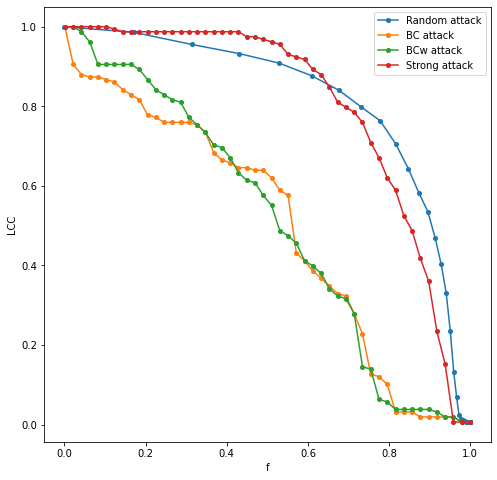

In [64]:
_ = test_robustness(G, strongly=True, plot=True)

In [75]:
fields = ['yr','rt3ISO','pt3ISO','cmdCode','TradeValue']
df = pd.read_csv("current_data/final_dataset.csv", skipinitialspace = True, usecols = fields)

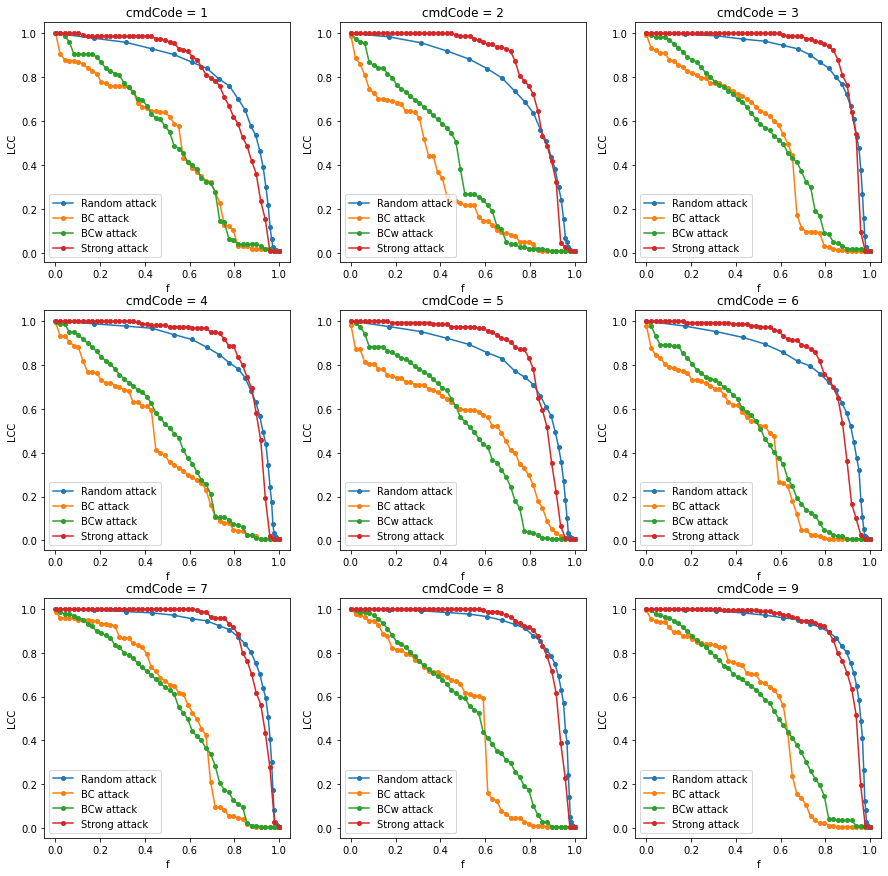

In [102]:
fig, ax = plt.subplots(3,3, figsize=[15,15])

for comm in range(1,10):

    G = nx.from_pandas_edgelist(df[df['cmdCode'] == comm],
                                source       = 'rt3ISO',
                                target       = 'pt3ISO',
                                edge_attr    =  'TradeValue',
                                create_using = nx.DiGraph())
    results = test_robustness(G, plot=False, cmdLabel=comm)
    for key in results.keys():
        ax[(comm-1)//3, (comm-1)%3].plot(results[key][0], results[key][1], '-o', label=key, markersize=4)
    ax[(comm-1)//3, (comm-1)%3].set_xlabel('f')
    ax[(comm-1)//3, (comm-1)%3].set_ylabel('LCC')
    ax[(comm-1)//3, (comm-1)%3].set_title('cmdCode = '+str(comm))
    ax[(comm-1)//3, (comm-1)%3].legend()
plt.show()